In [21]:
import tensorflow as tf
from tensorflow import keras as K
import numpy as np
import matplotlib.pyplot as plt

In [22]:
NUM_HIDDEN_UNITS = 64
EPOCHS = 500

In [23]:
# Load the Boston Housing Prices dataset
boston_housing = K.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))  # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [24]:
# Normalize features
# Test data is *not* used when calculating the mean and std
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


# Build the model
model = K.Sequential()
model.add(K.layers.Dense(NUM_HIDDEN_UNITS, activation='relu', input_shape=(train_data.shape[1],)))
model.add(K.layers.Dense(1, activation='linear'))
model.compile(loss='mse',
              optimizer=tf.train.RMSPropOptimizer(learning_rate=0.001),
              metrics=['mae'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_34 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Train the model
# Display training progress by printing a single dot for each completed epoch
class PrintDot(K.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0:
            print('Epoch #{}'.format(epoch))


# The patience parameter is the amount of epochs to check for improvement
early_stop = K.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

Epoch #0
Epoch #50
Epoch #100


(0, 5)

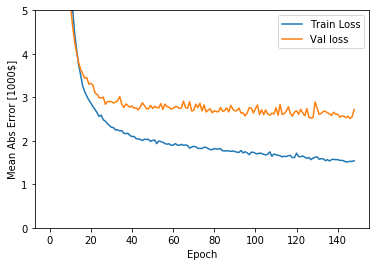

In [26]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [1000$]')
plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label='Val loss')
plt.legend()
plt.ylim([0, 5])

In [27]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("\n Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))


 Testing set Mean Abs Error: $2689.80


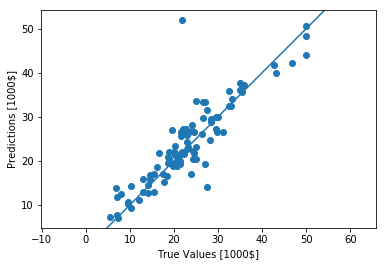

In [28]:
# Predict
test_predictions = model.predict(test_data).flatten()

plt.figure()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

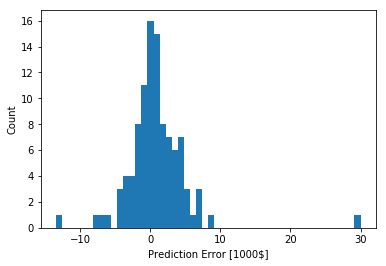

()


In [29]:
plt.figure()
error = test_predictions - test_labels
plt.hist(error, bins=50)
plt.xlabel("Prediction Error [1000$]")
plt.ylabel("Count")
plt.show()
print()